In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [29]:
df.shape

(569, 32)

**> DATA PREPROCESSING**

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [7]:
# Convert 'diagnosis' column to numeric
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])


In [8]:
# Check for missing values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [13]:
df = df.drop(columns=['Unnamed: 32'])

In [14]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
# Handle OTHER missing values for numeric columns(none in this case)
numeric_columns = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [16]:
# Detect and handle outliers using the Z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(df.iloc[:, 1:]))
outliers = (z_scores > 3).any(axis=1)
df_no_outliers = df[~outliers]


In [17]:
# Normalize/standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_no_outliers.drop(columns=['diagnosis']))
df_scaled = pd.DataFrame(scaled_features, columns=df_no_outliers.columns.drop('diagnosis'))
df_scaled['diagnosis'] = df_no_outliers['diagnosis'].values

# Final preprocessed dataset
df_processed = df_scaled
print(df_processed.head())

         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0 -0.226617     2.204465     -0.282612        2.068351   2.454131   
1  0.497493     1.914972      0.595678        1.928754   2.024982   
2  0.497992     2.112354     -1.148284        2.174252   2.352950   
3 -0.226606    -0.466770     -0.805044       -0.354381  -0.507699   
4 -0.226601     1.441255      0.275153        1.428130   1.456271   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0        -0.806833         -0.392414        0.206957             0.826142   
1         1.134031          1.588118        1.999878             2.601498   
2         0.407963          0.927616        2.009614             1.875733   
3         2.554936          1.834284        1.357347             1.155812   
4        -0.034703          0.347544        0.625576             0.943925   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0       0.154835  ...      -0.307819         1.938870

**> FEATURE ENGINEERING**

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 10 features using ANOVA F-test
X = df_processed.drop(columns=['diagnosis'])
y = df_processed['diagnosis']

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)


Selected Features: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'],
      dtype='object')


In [19]:
# Create a new DataFrame with the selected features
df_selected = pd.DataFrame(X_new, columns=selected_features)
df_selected['diagnosis'] = y.values

**> SVM**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df_selected.drop(columns=['diagnosis']), df_selected['diagnosis'], test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)


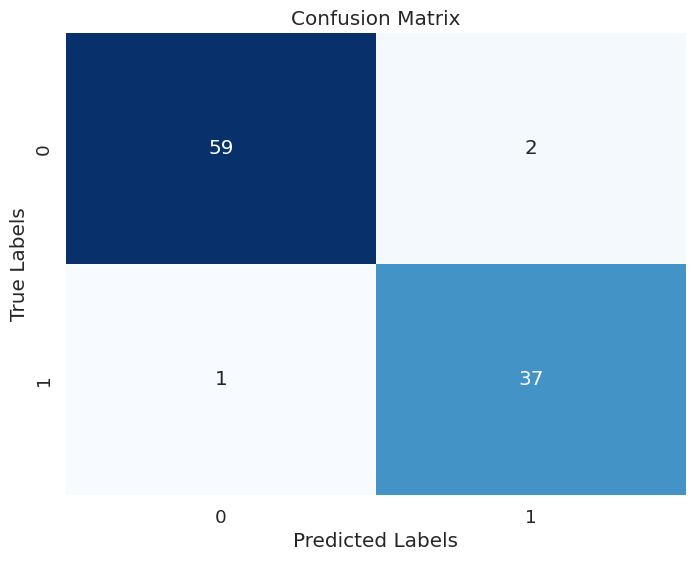

In [28]:
cm = confusion_matrix(y_test, y_pred)

# Plot 
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98        61
         1.0       0.95      0.97      0.96        38

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99



In [22]:
y_pred

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.])

In [23]:
y_pred_labels = label_encoder.inverse_transform(y_pred.astype(int))
y_test_labels = label_encoder.inverse_transform(y_test.astype(int))

In [24]:
results = pd.DataFrame({'True Label': y_test_labels, 'Predicted Label': y_pred_labels})
print(results.head(20)) 

   True Label Predicted Label
0           B               B
1           B               B
2           B               B
3           B               B
4           B               B
5           M               M
6           B               B
7           B               B
8           B               B
9           M               B
10          M               M
11          B               B
12          B               B
13          M               M
14          B               B
15          M               M
16          M               M
17          M               M
18          M               M
19          B               B
